<a href="https://colab.research.google.com/github/EX1cyclone/635_project_pollution_detect/blob/main/Spatiotemporal_Correlation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<ipython-input-3-67769fda2044>:34: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_dataframes = [df.resample('D').mean() for df in dataframes]


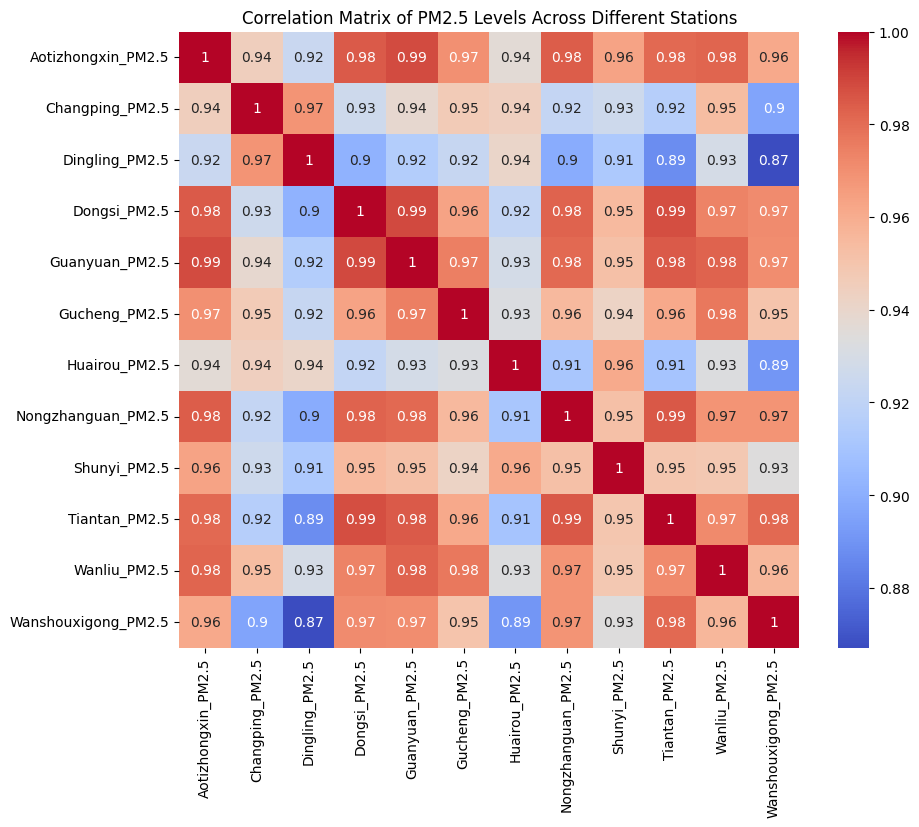

In [3]:
# Revised complete code for Spatiotemporal Correlation Analysis of PM2.5 levels

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the datasets
file_paths = [
    '/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv',
    '/content/PRSA_Data_Changping_20130301-20170228.csv',
    '/content/PRSA_Data_Dingling_20130301-20170228.csv',
    '/content/PRSA_Data_Dongsi_20130301-20170228.csv',
    '/content/PRSA_Data_Guanyuan_20130301-20170228.csv',
    '/content/PRSA_Data_Gucheng_20130301-20170228.csv',
    '/content/PRSA_Data_Huairou_20130301-20170228.csv',
    '/content/PRSA_Data_Nongzhanguan_20130301-20170228.csv',
    '/content/PRSA_Data_Shunyi_20130301-20170228.csv',
    '/content/PRSA_Data_Tiantan_20130301-20170228.csv',
    '/content/PRSA_Data_Wanliu_20130301-20170228.csv',
    '/content/PRSA_Data_Wanshouxigong_20130301-20170228.csv'
]

# Reading the data from each file and adding a station prefix to each column
dataframes = []
for file in file_paths:
    df = pd.read_csv(file)
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']])
    df.set_index('datetime', inplace=True)
    station_name = df['station'][0]  # Extracting station name from the first row
    df.columns = [f"{station_name}_{col}" for col in df.columns]
    dataframes.append(df)

# Aggregating the data to daily average
daily_dataframes = [df.resample('D').mean() for df in dataframes]

# Merging the daily datasets into a single dataframe
merged_daily_df = pd.concat(daily_dataframes, axis=1)

# Extracting only the PM2.5 columns for correlation analysis
pm25_columns = [col for col in merged_daily_df.columns if 'PM2.5' in col]
pm25_data = merged_daily_df[pm25_columns]

# Computing the correlation matrix
correlation_matrix = pm25_data.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of PM2.5 Levels Across Different Stations')
plt.show()
